In [2]:
import pandas as pd
import numpy as np
import os  

dir_path="C:\\Users\\VBUDHEW\\Desktop\\Predicitve Maintenance\\Bearing Data\\1st_test"

list_df=[]
for file in os.listdir(dir_path):
    #print(dir_path+"\\"+file)
    data=pd.read_csv(dir_path+"\\"+file, sep="	", header=None)
    data=data[::10]   ### As the data is too large increasing the sampling time by a factor of 10
    list_df.append(data)
data_conc=pd.concat(list_df)
column1=['B1C1','B1C2','B2C3','B2C4','B3C5','B3C6','B4C7','B4C8']
column2=['B1C1','B1C2','B2C3','B2C4']
print(data_conc)

           0      1      2      3      4      5      6      7
0     -0.022 -0.039 -0.183 -0.054 -0.105 -0.134 -0.129 -0.142
10    -0.093 -0.117 -0.039 -0.161 -0.132 -0.161 -0.090 -0.098
20    -0.132 -0.012 -0.110 -0.142  0.034 -0.042 -0.076 -0.149
30    -0.007 -0.088 -0.029 -0.044 -0.122 -0.083 -0.024 -0.142
40    -0.090 -0.039 -0.010 -0.098 -0.078 -0.103 -0.144 -0.151
...      ...    ...    ...    ...    ...    ...    ...    ...
20430 -0.032 -0.107 -0.100  0.181  0.303 -0.222  0.105 -0.137
20440 -0.251 -0.105 -0.176 -0.251  0.154 -0.103  0.212 -0.054
20450 -0.005 -0.188 -0.146 -0.242  0.210 -0.137 -0.093 -0.027
20460 -0.066 -0.151 -0.088 -0.081 -0.334  0.876 -0.029 -0.139
20470 -0.012 -0.085 -0.049 -0.085  0.105 -0.779 -0.273 -0.239

[4415488 rows x 8 columns]


In [3]:
column=['B1C1','B1C2','B2C3','B2C4','B3C5','B3C6','B4C7','B4C8']   #####Defining the columns as per the document 
data_conc.columns=column1

Text(0, 0.5, 'Acc magnitude')

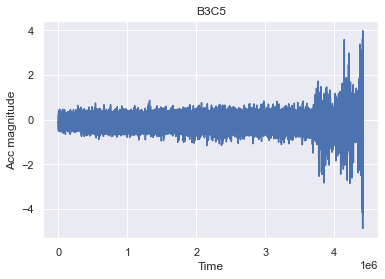

In [4]:
####Trying to visualize the data using simple matplotlib (For better version we can use seaborn)
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import matplotlib.pyplot as plt
#data_conc[['B3C5','B3C6']].plot(figsize=(12,3),title='Vibration Profile',subplots=True)  #####The samples it took were limited ==> we need to go with plotting the parameters indivisually
t=np.arange(0,4415488)   #####For sake of siplicity we can assign it ranodm time series also 
plt.plot(t,data_conc['B3C5'])
plt.title('B3C5')
plt.xlabel('Time')
plt.ylabel('Acc magnitude')

Text(0.5, 1.0, 'RMS value plot')

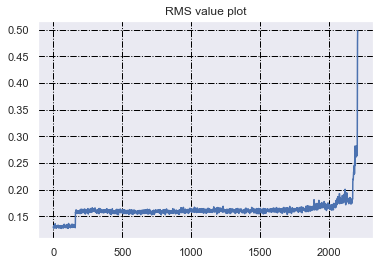

In [5]:
####Woorking on B3C5#####   As we can see that the vobration has increased at the end and we want to focus on the change in the vibration vaues gradually
##The best way to analyse the time domin vibratioin is to calculate it's energy which is directly proportional to its RMS value (Signal processing basics)


###Taking the window of 2000 samples and see the results######   ====>> You can use different window size for visualization 

def rms_cal(data):
    return(np.sqrt((data ** 2) .sum ()/data.size))

rms_list=[]
data_under_observation=data_conc['B3C5']
for i in range(int(len(data_conc['B3C5'])/2000)):
    if i==2207:
        rms_val=rms_cal(data_conc['B3C5'][(i*2000):])
    else:
        rms_val=rms_cal(data_conc['B3C5'][i*2000:(i+1)*2000])
    rms_list.append(rms_val)
    
plt.plot(rms_list)
plt.grid('True',color='black',ls='-.')
plt.title('RMS value plot')   ####The plot clearly shows us the change in the RMS values over the period of given timelines


#### So what we basically have done here is that we have the same profile of vibration but it is been visualized in little samples and in clearer way!!!!!! Think Think Thinkk

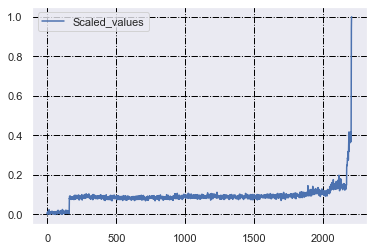

In [6]:
####Now that we can clearly see the difference of RMS amplitude of the vibrations over the period of time , we want to classiify all this profle into 3-4 classes such tht it can help us see the deradation of the equipment over the period
#### This is a classical exmaple of Unsupervised learning  #######

from sklearn import preprocessing
rms_list=np.array(rms_list)
rms_list=rms_list.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()  
x_scaled = min_max_scaler.fit_transform(rms_list)
df_scaled = pd.DataFrame(x_scaled,columns=['Scaled_values'])
df_scaled.plot()
plt.grid("True",ls='-.',color='black')

In [7]:
###This is the only cell where we are applying actual MACHINE LEARNING!!!!!!!!##### All other cells has the most important contribution towawards the output that we are going to get in the time domain
from sklearn.cluster import DBSCAN
reshaped_data_for_training=np.array(df_scaled).reshape(-1,1)
db = DBSCAN(eps=0.02, min_samples=5).fit(reshaped_data_for_training)
core_samples_mask_rms = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask_rms[db.core_sample_indices_] = True
labels_ave = db.labels_
n_clusters_ = len(set(labels_ave)) - (1 if -1 in labels_ave else 0)
n_noise_ = list(labels_ave).count(-1)
result=labels_ave

In [8]:
reshaped_data_for_training=reshaped_data_for_training.reshape(1,-1)
Df=pd.DataFrame({'Ave_list':reshaped_data_for_training[0],'result':result})

In [9]:
n_clusters_  #### We got 4 classes in which we can categorise the vibraiton values f vibraiton over the given period of time !!! 

4

Text(0.5, 1.0, 'Clustering based on RMS value of Vibration')

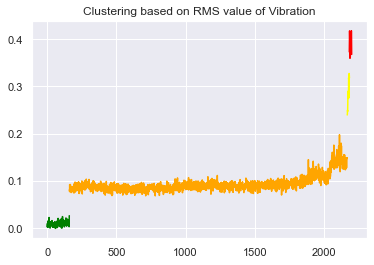

In [10]:
#####Lets visualize that######
condition1=Df.loc[Df['result']==0]
condition2=Df.loc[Df['result']==1]
condition3=Df.loc[Df['result']==2]
condition4=Df.loc[Df['result']==3]
condition5=Df.loc[Df['result']==-1]
plt.plot(condition1['Ave_list'],color='green')
plt.plot(condition2['Ave_list'],color='orange')
plt.plot(condition3['Ave_list'],color='yellow')
plt.plot(condition4['Ave_list'],color='red')
plt.title('Clustering based on RMS value of Vibration')

# THis looks nice and we can see that the total life of the component from which we are measuring the vibration can be categorised in 
#1.Green Zone
#2.Orange Zone
#3.Yello Zone
#4.Red Zone

#From the time domain analysis we have created a model which can tell us by looking at the RMS value of the virabtion in which stage of its life the component is falling

In [ ]:
#####Trust me we have a lot of scope towards the Frequency domain Analysis #######

In [11]:
##### FFT Analysis for the Error Detection #######
FFT_list=[]
data_under_observation=data_conc['B3C5']
for i in range(int(len(data_conc['B3C5'])/2000)):
    if i==int(len(data_conc['B3C5'])/2000): 
        FFT_list.append(data_conc['B3C5'][(i*2000):])
    else:
        FFT_list.append(data_conc['B3C5'][i*2000:(i+1)*2000])

In [12]:
len(FFT_list)   #####From Absolute value analysis we know that the first cluster are first 160 samples 

2207

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000158D47298E0>,
      dtype=object)

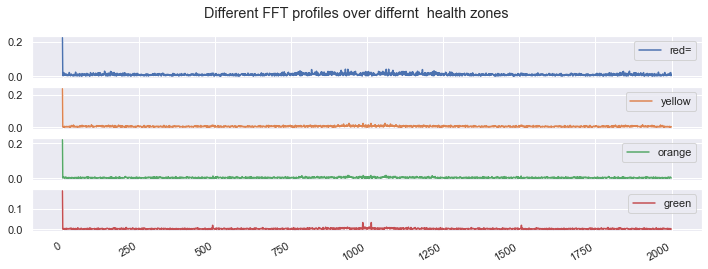

In [23]:
from scipy.fft import fft
if data_under_observation.isnull().values.any():
    data_under_observation.fillna(method='ffill',inplace=True) ####As this is an engineering data we dont really want to go with complicated imputers ####
fft_Red_signal=fft(FFT_list[2200].values)
fft_yellow_signal=fft(FFT_list[2147].values)
fft_orange_signal=fft(FFT_list[1200].values)
fft_green_signal=fft(FFT_list[134].values)
freqaxis=np.fft.fftfreq(fft_Red_signal.size, d=1/fft_Red_signal.size)
fft_values_red=2*np.abs(fft_Red_signal)/fft_Red_signal.size       ####This is the ideal conditon for calculating FFT
fft_values_yellow=2*np.abs(fft_yellow_signal)/fft_yellow_signal.size
fft_values_orange=2*np.abs(fft_orange_signal)/fft_orange_signal.size
fft_values_green=2*np.abs(fft_green_signal)/fft_green_signal.size
#fft_new_signal=fft(FFT_list[2200].values)
df_fft=pd.DataFrame({'red=':fft_values_red,'yellow':fft_values_yellow,'orange':fft_values_orange,'green':fft_values_green})
df_fft.plot(figsize=(12,4),subplots=True,title='Different FFT profiles over differnt  health zones')

In [34]:
########Lets consider the vibration to be random and see the power content in the signals in the first 3 fundamental frequencies of 4 different zone######
from scipy import signal
Percent_stored_power=[]
for c in df_fft.columns:
    sig=df_fft[c].values
    f, Pxx_den=signal.welch(sig,nperseg=2000,fs=2000)
    Percent_stored_power.append((sum(Pxx_den[:80])/sum(Pxx_den)*100))   ####Cheking the information content in the first 60 Hz of bandwidth

Text(0.5, 1.0, 'Over the period the Enery content has decreased in the first 60 Hz of bandwidth')

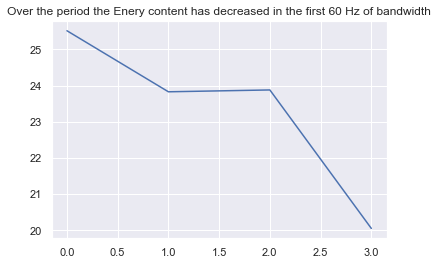

In [35]:
plt.plot(Percent_stored_power)
plt.title('Over the period the Enery content has decreased in the first 80 Hz of bandwidth')

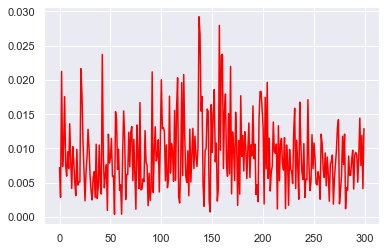

In [42]:
###This gives another indicator of the changes in the given data for B3C5
####Now lets come back to the FFTs####
plt.plot(df_fft['red='].values[1:][0:300],color='red')


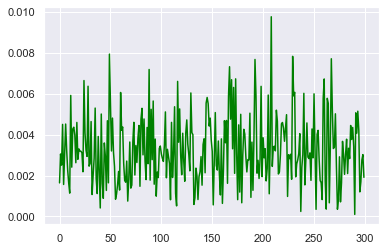

In [43]:
plt.plot(df_fft['green'].values[1:][0:300],color='green')

# The description above for Analysis of vibration data/ or any engineering sensor data is very primilary in nature and for applying actual machine learning algortihms we need to explore the results more vividly #####